In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
df = pd.read_csv('../../data/training.csv') 

In [4]:
df['TrimLevel']="nan" #index 34
df['BodyStyle']="nan" #index 35

In [5]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'TrimLevel', 'BodyStyle'],
      dtype='object')

### BodyStyle

In [6]:
df['SubModel'].unique()

array(['4D SEDAN EX', '4D SEDAN SXT FFV', '4D WAGON', 'PASSENGER 3.9L',
       'MINIVAN 3.3L', '4D SEDAN', '4D SEDAN SE1', '4D SUV 4.7L',
       '4D SEDAN LS', '4D SEDAN LS CLASSIC', '4D SPORT UTILITY',
       '4D SUV 4.7L SLT', '2D COUPE', 'EXT CAB 4.3L', '4D SEDAN XE',
       '4D SUV 4.0L SPORT TRAC', 'PASSENGER 3.9L SE', 'QUAD CAB 4.7L',
       '4D SEDAN CUSTOM', '4D SPORT UTILITY EX', '4D SEDAN ES',
       'REG CAB 4.2L XL', '4D SEDAN SE', '4D SEDAN SXT',
       'EXT CAB 4.2L W/T', '4D SUV 4.0L FFV LIMITED', '4D SEDAN LT',
       'MINIVAN 3.8L SXT', '4D SEDAN LX AUTO', 'PASSENGER 3.9L LX',
       '4D SUV 4.8L', '4D SUV LS', '4D SEDAN CLASSIC', '4D SEDAN TOURING',
       '4D SEDAN SES', '4D SUV 2.2L LS', '4D SEDAN LT 3.5L',
       '4D SUV 4.2L LS', '4D SEDAN LIMITED', '2D COUPE SS',
       '4D SEDAN GLS', '4D UTILITY 5.3L FFV', '4D SPORT',
       'MINIVAN 2.4L SE', '4D SPORT UTILITY LS', '4D SEDAN GS',
       '4D SEDAN TOURING TURBO', '4D SEDAN LEVEL 2', '4D SEDAN SEL',
       '4D S

In [7]:
a = df.index

In [8]:
#Convertible
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" CONVERTIBLE ", txt) or re.search(" CONVERTIBLE", txt) or re.search("CONVERTIBLE ", txt):
        df.iat[x, 35] = "Convertible"

In [9]:
#Sedan
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" SEDAN ", txt) or re.search(" SEDAN", txt) or re.search("SEDAN ", txt):
        df.iat[x, 35] = "Sedan"

In [10]:
#Hatchback
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" HATCHBACK ", txt) or re.search(" HATCHBACK", txt) or re.search(" HATCKBACK ", txt):
        df.iat[x, 35] = "Hatchback"

In [11]:
#Wagon
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" WAGON ", txt) or re.search("WAGON ", txt) or re.search(" WAGON", txt):
        df.iat[x, 35] = "Wagon"

In [12]:
#Truck (i vari tipi di CAB sono varie configurazioni dei Truck)
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" CAB ", txt) or re.search("CAB ", txt) or re.search(" CAB", txt):
        df.iat[x, 35] = "Truck"

In [13]:
#SUV
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" SUV ", txt) or re.search(" SUV", txt) or re.search(" SUV*", txt) or re.search("SUV ", txt) or re.search("SPORT UTILITY", txt) or re.search(" SPORT UTILITY ", txt) or re.search(" SPORT UTILITY", txt):
        df.iat[x, 35] = "SUV"

In [14]:
#Crossover
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" CROSSOVER ", txt) or re.search("CROSSOVER ", txt) or re.search(" CROSSOVER", txt) or re.search(" CUV ", txt) or re.search("CUV ", txt) or re.search(" CUV", txt) or re.search("XUV", txt):
        df.iat[x, 35] = "Crossover"

In [15]:
#Coupe
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" COUPE ", txt) or re.search(" COUPE", txt) or re.search("COUPE ", txt):
        df.iat[x, 35] = "Coupe"

In [16]:
#Van
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" MINIVAN ", txt) or re.search(" MINIVAN", txt) or re.search("MINIVAN ", txt) or re.search(" VAN ", txt) or re.search("VAN ", txt) or re.search(" VAN", txt):
        df.iat[x, 35] = "Van"

In [17]:
#Jeep
for x in a:
    txt = str(df.iat[x, 9])
    if re.search("JEEP ", txt):
        df.iat[x, 35] = "Jeep"

#### Ora guardo Size

In [18]:
b = df[df["BodyStyle"]=="nan"].index

In [19]:
#Crossover
for x in b:
    txt = str(df.iat[x, 16])
    if re.search("CROSSOVER", txt):
        df.iat[x, 35] = "Crossover"

In [20]:
#Truck
for x in b:
    txt = str(df.iat[x, 16])
    if re.search("SMALL TRUCK", txt):
        df.iat[x, 35] = "Truck"

In [21]:
#SUV
for x in b:
    txt = str(df.iat[x, 16])
    if re.search("LARGE SUV", txt) or re.search("MEDIUM SUV", txt) or re.search("SMALL SUV", txt):
        df.iat[x, 35] = "SUV"

In [22]:
#Van
for x in b:
    txt = str(df.iat[x, 16])
    if re.search("VAN", txt):
        df.iat[x, 35] = "Van"

#### Ora guardo Model

In [23]:
c = df[df["BodyStyle"]=="nan"].index #model index 7
df1 = df[df["BodyStyle"]=="nan"]

In [24]:
#Sedan
for x in c:
    txt = str(df.iat[x, 7])
    if re.search("MAZDA3", txt) or re.search("LANCER", txt) or re.search("STRATUS", txt) or re.search("TAURUS", txt) or re.search("IMPALA 3.4L V6 SFI", txt) or re.search("GRAND AM V6 3.4L V6", txt):
        df.iat[x, 35] = "Sedan"

In [25]:
#Convertible
for x in c:
    txt = str(df.iat[x, 7])
    if re.search("ECLIPSE", txt) or re.search("SOLSTICE", txt):
        df.iat[x, 35] = "Convertible"

In [26]:
#Truck
for x in c:
    txt = str(df.iat[x, 7])
    if re.search("SIERRA 1500", txt):
        df.iat[x, 35] = "Truck"

In [27]:
#Coupe
for x in c:
    txt = str(df.iat[x, 7])
    if re.search("CELICA", txt):
        df.iat[x, 35] = "Coupe"

In [28]:
df["BodyStyle"].value_counts()

Sedan          33900
SUV             8526
Van             4468
Wagon           3320
Truck           3147
Crossover       2334
Coupe           2096
Convertible      398
Hatchback        191
Jeep               6
Name: BodyStyle, dtype: int64

In [29]:
df["BodyStyle"].isnull().sum()

0

<p> Non ci sono missing values.</p>

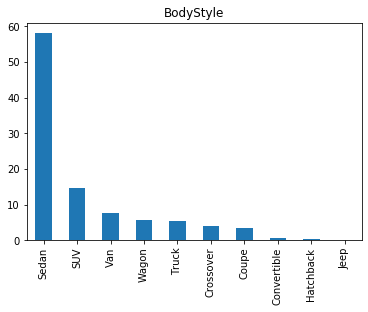

In [30]:
(df['BodyStyle'].value_counts(normalize=True)*100).plot(kind='bar', 
                                   title='BodyStyle')
plt.show() 

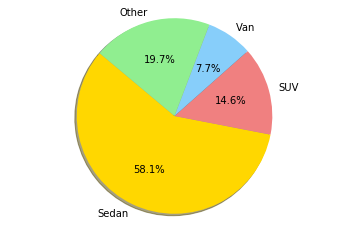

In [31]:
#Pie chart of BodyStyle
# Data to plot
labels = 'Sedan', 'SUV', 'Van', 'Other'
sizes = [33900, 8526, 4468, 11492]
colors = ['gold', 'lightcoral', 'lightskyblue','lightgreen']
explode = (0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<p>Le macchne più comprate sono le Sedan (58,1%) seguite dai SUV (14,6%)</p>

In [32]:
# vage
vage_xt = pd.crosstab(df['BodyStyle'], df['IsBadBuy']) #the result of this corsstable will be assigned to a variable

In [33]:
# Normalize the cross tab to sum to 1:
vage_xt_pct = vage_xt.div(vage_xt.sum(1).astype(float), axis=0)

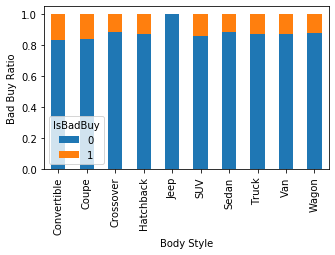

In [36]:
#Then I can visualize it with a bar plot (staked: different values in the same bar)
#vage_xt_pct.plot(kind='bar', stacked=True, 
#                   title='Bad/good buy by body style')
vage_xt_pct.plot(kind='bar', stacked=True, figsize=(5.1,3))
plt.xlabel('Body Style')
plt.ylabel('Bad Buy Ratio')
plt.show()

<p>Le Jeep sono sempre un buon acquisto (solo 6 Jeep, dato non significativo), come le Sedan in media</p>
<p>In Convertible e Coupe si registra il maggior numero di cattivi acquisti (pochi valori)</p>
<p>Per SUV sono registrati più cattivi acquisti di quelli registrati per Sedan</p>

### TrimLevel

In [ ]:
e = df.index

In [ ]:
df['SubModel'].unique()

In [ ]:
#Standard
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" SL ", txt) or re.search(" SL", txt) or re.search("BASE", txt) or re.search(" SLE ", txt) or re.search(" SLE", txt) or re.search(" SLT ", txt) or re.search(" SLT", txt):
        df.iat[x, 34] = "Standard"

In [ ]:
#Deluxe
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" DX ", txt) or re.search(" DX", txt) or re.search(" DL ", txt) or re.search(" DL", txt):
        df.iat[x, 34] = "Deluxe"

In [ ]:
#Luxury
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" LS ", txt) or re.search(" LS", txt) or re.search(" LX ", txt) or re.search(" LX", txt) or re.search(" LE ", txt) or re.search(" XLT ", txt) or re.search(" LT ", txt) or re.search(" LT", txt) or re.search(" LUXURY ", txt) or re.search(" LUXURY", txt) or re.search(" LIMITED ", txt) or re.search(" LIMITED", txt):
        df.iat[x, 34] = "Luxury"

In [ ]:
#Gran Turismo
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" GT ", txt) or re.search(" GT", txt):
        df.iat[x, 34] = "Gran Turismo"

In [ ]:
#Sport
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" SE ", txt) or re.search(" SE", txt) or re.search(" S ", txt) or re.search(" S", txt) or re.search(" SPORT ", txt) or re.search(" SPORT", txt) or re.search("SPORT ", txt):
        df.iat[x, 34] = "Sport"

In [ ]:
#Touring
for x in a:
    txt = str(df.iat[x, 9])
    if re.search(" GT ", txt):
        df.iat[x, 34] = "Touring"

In [ ]:
df["TrimLevel"].value_counts()

#####  Info at
<p>https://www.carwow.co.uk/guides/choosing/car-body-types-guide-0631 - Body</p>
<p>https://www.liveabout.com/glx-gls-se-si-lx-what-do-they-mean-4083747 - Trim</p>
<p>https://www.valuepenguin.com/auto-insurance/car-make-model</p>
<p>https://www.autosimple.com/blog/car-body-styles/ - Body</p>
<p>https://www.galetoyota.com/blog/what-are-the-different-toyota-trim-levels/ - Trim</p>
<p>https://www.quora.com/What-do-LE-CE-SE-XLE-and-S-indicate-in-car-trims - Trim</p>
<p>https://www.gorhino.com/how-to-fitment --> CAB Types</p>
<p>https://www.cartrade.com/blog/2013/auto-guides/different-car-body-types-494.html - Body</p>
<p>https://en.wikipedia.org/wiki/Car_classification#SUVs_/_off-road_vehicles - Body</p>